In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

import warnings
warnings.filterwarnings('ignore')

datadir = '/data1/shahs3/users/mezallj1/data/dlpfc'

In [14]:
def read_pickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [15]:
def plot_spatial(datadir, slice):
    adata_graphst = sc.read_h5ad(f'{datadir}/graphst/{slice}_graphst.h5ad')
    adata_stagate = sc.read_h5ad(f'{datadir}/stagate/{slice}_stagate.h5ad')
    adata_grafiti = sc.read_h5ad(f'{datadir}/grafiti/{slice}_grafiti.h5ad')

    adata_stagate.obs['mclust'] = pd.Series(adata_stagate.obs['mclust']).astype('category')
    
    fig, axes = plt.subplots(1, 4, figsize=(24, 4))
    sc.pl.embedding(adata_graphst, basis='spatial', title = 'Ground Truth', color='Region', ax=axes[0], s=50, show=False)
    sc.pl.embedding(adata_graphst, basis='spatial', title = 'GraphST: %.3f'%(graphst[slice]), color ='mclust', ax=axes[1], s=50, show=False)
    sc.pl.embedding(adata_stagate, basis='spatial', title = 'STAGATE: %.3f'%(stagate[slice]), color ='mclust', ax=axes[2], s=50, show=False)
    sc.pl.embedding(adata_grafiti, basis='spatial', title = 'Grafiti: %.3f'%(grafiti[slice]), color ='grafiti_motif', ax=axes[3], s=50, show=False)
    plt.tight_layout()
    plt.show()

In [16]:
stagate = read_pickle(f'{datadir}/stagate/ari_stagate.pkl')
graphst = read_pickle(f'{datadir}/graphst/ari_graphst.pkl')
grafiti = read_pickle(f'{datadir}/grafiti/ari_grafiti.pkl')

In [17]:
stagate

{'151673': 0.33293315563910625,
 '151510': 0.3572377194699102,
 '151672': 0.4342564978829444,
 '151669': 0.28814774187526976,
 '151674': 0.3519531633530422,
 '151671': 0.29464444886658075,
 '151676': 0.30645131563470107,
 '151508': 0.3110608284992572,
 '151670': 0.224196169576054,
 '151509': 0.4350215641575303,
 '151507': 0.3742268910701633,
 '151675': 0.3664831496700788}

In [18]:
graphst

{'151673': 0.5998853128696566,
 '151510': 0.4867341042731746,
 '151672': 0.4660883841743893,
 '151669': 0.3866047103332981,
 '151674': 0.44224595228963287,
 '151671': 0.5760126815466183,
 '151676': 0.5373622642794826,
 '151508': 0.44886510035018906,
 '151670': 0.3603030459168644,
 '151509': 0.40500383502280424,
 '151507': 0.428203561470316,
 '151675': 0.48444512210933055}

In [19]:
grafiti

{'151673': 0.2155232364040039,
 '151510': 0.20128102239791387,
 '151672': 0.16417439869625242,
 '151669': 0.1320685651075595,
 '151674': 0.17000088018782952,
 '151671': 0.1660982298266653,
 '151676': 0.17661919956402475,
 '151508': 0.21207451926481966,
 '151670': 0.18033817471112779,
 '151509': 0.2880968571849273,
 '151507': 0.0005822538645499953,
 '151675': 0.22492226756959638}

In [20]:
df = pd.DataFrame({
    'GraphST': graphst,
    'STAGATE': stagate,
    'Graffiti': grafiti
})

In [21]:
df

,GraphST,STAGATE,Graffiti
151673,0.599885,0.332933,0.215523
151510,0.486734,0.357238,0.201281
151672,0.466088,0.434256,0.164174
151669,0.386605,0.288148,0.132069
151674,0.442246,0.351953,0.170001
151671,0.576013,0.294644,0.166098
151676,0.537362,0.306451,0.176619
151508,0.448865,0.311061,0.212075
151670,0.360303,0.224196,0.180338
151509,0.405004,0.435022,0.288097


In [22]:
# Transpose the DataFrame to get keys as rows and dictionaries as columns
df = df.T

# Melt the DataFrame for seaborn
df_melted = df.reset_index().melt(id_vars='index', var_name='Sample', value_name='Score')
df_melted.rename(columns={'index': 'Method'}, inplace=True)

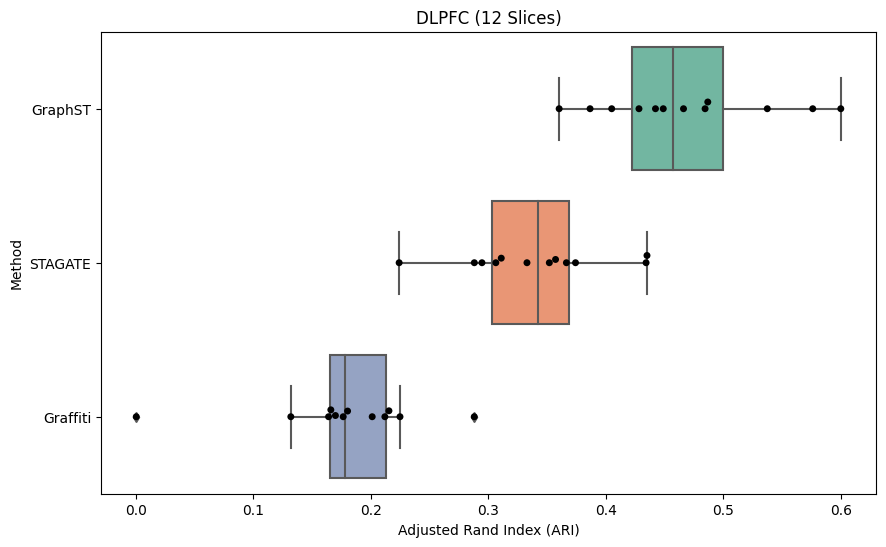

In [23]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Method', data=df_melted, palette='Set2')
sns.swarmplot(x='Score', y='Method', data=df_melted, color='k', size=5)

# Customizing the plot
plt.xlabel('Adjusted Rand Index (ARI)')
plt.ylabel('Method')
plt.title('DLPFC (12 Slices)')
plt.show()

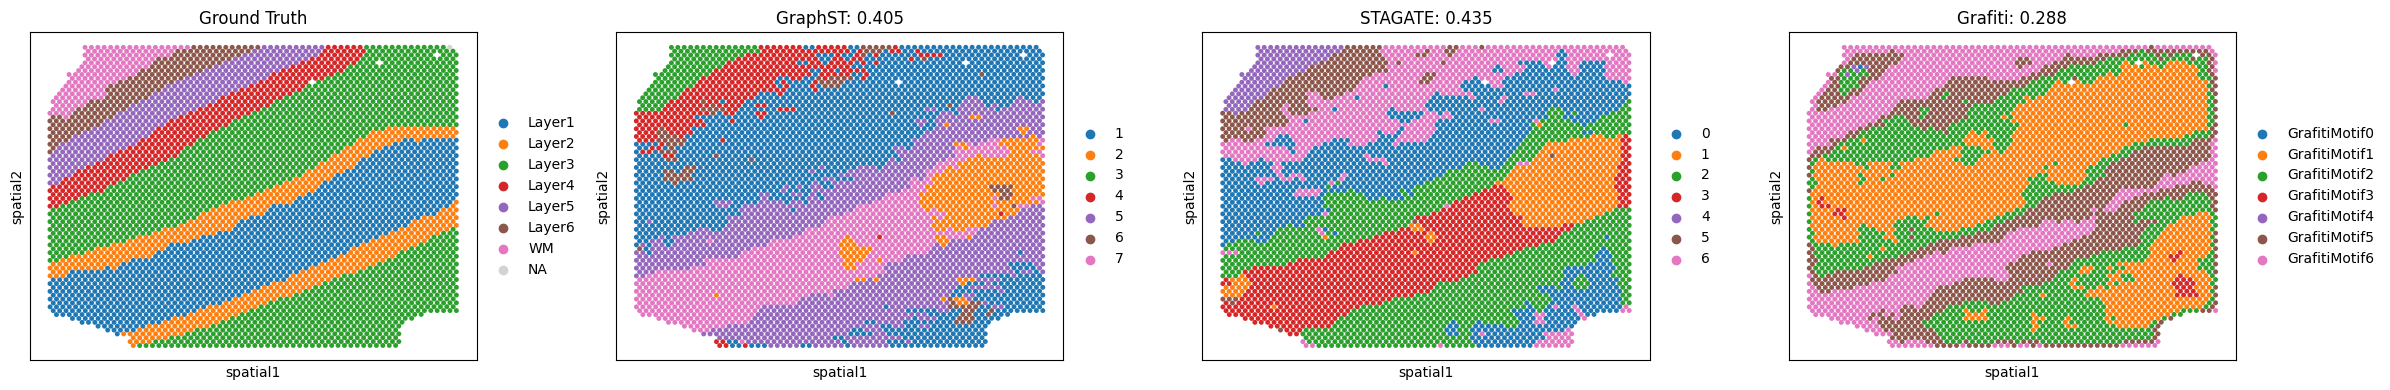

In [26]:
plot_spatial(datadir, '151509')